<a href="https://colab.research.google.com/github/kul-pat/Public-Machine-learning/blob/main/Copy_of_DIABETES_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
## Loadind datasets
df =pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.all()


Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction     True
Age                          True
Outcome                     False
dtype: bool

In [ ]:
df['Glucose']=np.where(df['Glucose']==0,df['Glucose'].median(),df['Glucose'])
df['Insulin']=np.where(df['Insulin']==0,df['Insulin'].median(),df['Insulin'])
df['SkinThickness']=np.where(df['SkinThickness']==0,df['SkinThickness'].median(),df['SkinThickness'])
df['BloodPressure']=np.where(df['BloodPressure']==0,df['BloodPressure'].median(),df['BloodPressure'])
df['BMI']=np.where(df['BMI']==0,df['BMI'].median(),df['BMI'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
#### Independent And Dependent features
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [ ]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
pd.DataFrame(X,columns=df.columns[:-1])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,30.5,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,23.0,30.5,30.1,0.349,47


In [ ]:
#### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=230, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[98  9]
 [18 29]]
0.8246753246753247
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



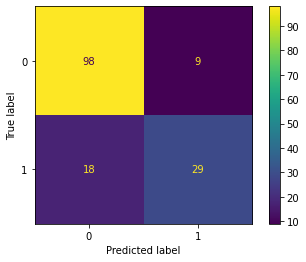

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_classifier, X_test, y_test)  
plt.show()

In [ ]:
!pip install optuna

     |████████████████████████████████| 308 kB 5.0 MB/s 
     |████████████████████████████████| 80 kB 7.4 MB/s 
     |████████████████████████████████| 209 kB 37.8 MB/s 
     |████████████████████████████████| 75 kB 4.2 MB/s 
     |████████████████████████████████| 144 kB 56.3 MB/s 
     |████████████████████████████████| 112 kB 57.7 MB/s 
     |████████████████████████████████| 49 kB 4.7 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=aae14476d777c9cc5abef1c585dd6914b0faaae22ed501646dd42edac3f73885
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import optuna
import sklearn.svm
def objective(trial):
    classifier = X_train,y_train
    n_estimators = trial.suggest_int('n_estimators', 2, 2000)
    max_depth = int(trial.suggest_float('max_depth', 1, 200))
    optimizer = trial.suggest_categorical('rf_criterion', ['gini', 'entropy'])
    clf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,criterion=optimizer)
    return sklearn.model_selection.cross_val_score(clf, X_train,y_train, 
           n_jobs=-1, cv=10).mean()

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-11-06 09:49:47,739] A new study created in memory with name: no-name-102af8ed-109d-4539-afc0-c23c2fdacc0b
[I 2021-11-06 09:50:24,150] Trial 0 finished with value: 0.7491538868323637 and parameters: {'n_estimators': 1971, 'max_depth': 71.1637957757582, 'rf_criterion': 'entropy'}. Best is trial 0 with value: 0.7491538868323637.
[I 2021-11-06 09:50:48,477] Trial 1 finished with value: 0.7427287149656266 and parameters: {'n_estimators': 1568, 'max_depth': 54.09344322208823, 'rf_criterion': 'gini'}. Best is trial 0 with value: 0.7491538868323637.
[I 2021-11-06 09:51:00,538] Trial 2 finished with value: 0.7475409836065573 and parameters: {'n_estimators': 780, 'max_depth': 90.88305121821207, 'rf_criterion': 'gini'}. Best is trial 0 with value: 0.7491538868323637.
[I 2021-11-06 09:51:19,399] Trial 3 finished with value: 0.7475409836065573 and parameters: {'n_estimators': 1054, 'max_depth': 104.83033358772069, 'rf_criterion': 'entropy'}. Best is trial 0 with value: 0.7491538868323637.
[

Accuracy: 0.7573506081438393
Best hyperparameters: {'n_estimators': 1783, 'max_depth': 9.611273462266132, 'rf_criterion': 'entropy'}


In [ ]:
trial

FrozenTrial(number=69, values=[0.752415112386418], datetime_start=datetime.datetime(2021, 11, 6, 9, 13, 44, 635972), datetime_complete=datetime.datetime(2021, 11, 6, 9, 13, 49, 358189), params={'classifier': 'RandomForest', 'n_estimators': 1040, 'max_depth': 11.749619872671314}, distributions={'classifier': CategoricalDistribution(choices=('RandomForest', 'SVC')), 'n_estimators': IntUniformDistribution(high=2000, low=200, step=10), 'max_depth': LogUniformDistribution(high=100.0, low=10.0)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=69, state=TrialState.COMPLETE, value=None)

In [ ]:
study.best_params

{'classifier': 'RandomForest',
 'max_depth': 11.749619872671314,
 'n_estimators': 1040}

In [ ]:
rf=RandomForestClassifier(n_estimators=1040,max_depth=12)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1040,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[94 13]
 [16 31]]
0.8116883116883117
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       107
           1       0.70      0.66      0.68        47

    accuracy                           0.81       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.81      0.81      0.81       154

